In [2]:
import pandas as pd
import experiment_util as util
import models
import numpy as np
import random
import matplotlib.pyplot as plt
import plot_util as putil

np.random.seed(0)
random.seed(0)

In [2]:
raw_df=pd.read_csv("../Datasets/Research/OULAD/studentInfo.csv",index_col=[2])

df=raw_df.copy()
df = df.loc[~df.index.duplicated(keep='first')]
df

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
id_student,,,,,,,,,,,
11391,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
28400,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
30268,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
31604,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
32885,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...
2640965,GGG,2014J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
2645731,GGG,2014J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
2648187,GGG,2014J,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass


In [3]:
df["final_result"]=df["final_result"].replace(['Distinction','Withdrawn'],['Pass','Fail'])
#unifiying Distinction and Withdrawn label to simplify the dataset task (as well as make different datasets comparable)

In [4]:
folds_index=np.array_split(df.sample(frac=1).index,5)
eval=util.evaluation(df,"gender","final_result","M",folds_index)
pre_df=util.preporcess_transform(df)
result=pd.DataFrame([],columns=util.column)
result.columns.name="OULAD"
result

OULAD,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity


In [5]:
result=util.append_Series(result,eval.cross_validation("Random Forest",models.RandomForest,pre_df))
result

/home/kdai332/Documents/Ethical-Framework/Aequitas/experiment_util.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df=pd.concat([dataframe,pd.DataFrame([series.to_list()],index=[series.name],columns=column)])


OULAD,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.582282,0.930638,0.949393,0.842733,0.922629


In [6]:
result=util.append_Series(result,eval.cross_validation("Gradient Boost",models.GradientBoost,pre_df))
result

OULAD,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.582282,0.930638,0.949393,0.842733,0.922629
Gradient Boost,0.624944,0.794655,0.968529,0.762706,0.835003


In [7]:
result=util.append_Series(result,eval.cross_validation("FairGBM",models.Fairgbm,pre_df))
result

OULAD,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.582282,0.930638,0.949393,0.842733,0.922629
Gradient Boost,0.624944,0.794655,0.968529,0.762706,0.835003
FairGBM,0.590307,0.998531,0.913144,0.909947,0.996798


In [8]:
result=util.append_Series(result,eval.cross_validation("Fair Learn",models.Fairlearn,pre_df))
result

[INFO] 2024-02-13 22:47:18 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-13 22:47:18 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-13 22:47:18 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.
[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory 

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 17582, number of negative: 5446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501560 -> initscore=0.006240
[LightGBM] [Info] Start training from score 0.006240


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 17706, number of negative: 5322
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529981 -> initscore=0.120067
[LightGBM] [Info] Start training from score 0.120067


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12260, number of negative: 10768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532395 -> initscore=0.129763
[LightGBM] [Info] Start training from score 0.129763


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[INFO] 2024-02-13 22:47:35 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-13 22:47:35 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-13 22:47:35 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.
[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory 

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12192, number of negative: 10836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529442 -> initscore=0.117906
[LightGBM] [Info] Start training from score 0.117906
[INFO] 2024-02-13 22:47:53 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-13 22:47:53 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.ut

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, 

[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 17577, number of negative: 5451
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501555 -> initscore=0.006218
[LightGBM] [Info] Start training from score 0.006218


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532309 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 17577, number of negative: 5451
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528449 -> initscore=0.113920
[LightGBM] [Info] Start training from score 0.113920


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12258, number of negative: 10770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532308 -> initscore=0.129414
[LightGBM] [Info] Start training from score 0.129414
[INFO] 2024-02-13 22:48:11 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-13 22:48:11 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.ut

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, 

[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 17606, number of negative: 5422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501475 -> initscore=0.005898
[LightGBM] [Info] Start training from score 0.005898


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 17606, number of negative: 5422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530025 -> initscore=0.120246
[LightGBM] [Info] Start training from score 0.120246


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12213, number of negative: 10815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530354 -> initscore=0.121567
[LightGBM] [Info] Start training from score 0.121567
[INFO] 2024-02-13 22:48:31 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-13 22:48:31 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.ut

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, 

[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 17702, number of negative: 5326
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.527115 -> initscore=0.108567
[LightGBM] [Info] Start training from score 0.108567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 12305, number of negative: 10723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534349 -> initscore=0.137615
[LightGBM] [Info] Start training from score 0.137615


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 17702, number of negative: 5326
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 23028, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.527115 -> initscore=0.108567
[LightGBM] [Info] Start training from score 0.108567


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


OULAD,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.582282,0.930638,0.949393,0.842733,0.922629
Gradient Boost,0.624944,0.794655,0.968529,0.762706,0.835003
FairGBM,0.590307,0.998531,0.913144,0.909947,0.996798
Fair Learn,0.597846,1.031900,0.877074,0.936187,1.025665


In [10]:
result.to_csv("OULAD_result.csv")

In [7]:
import importlib
importlib.reload(models)
importlib.reload(util)
importlib.reload(putil)

<module 'plot_util' from 'c:\\Users\\15783\\source\\repos\\Ethical-Framework\\Aequitas\\plot_util.py'>

In [3]:
result=pd.read_csv("OULAD_result.csv",index_col=0)
result

,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.582282,0.930638,0.949393,0.842733,0.922629
Gradient Boost,0.624944,0.794655,0.968529,0.762706,0.835003
FairGBM,0.590307,0.998531,0.913144,0.909947,0.996798
Fair Learn,0.597846,1.031900,0.877074,0.936187,1.025665


c:\Users\15783\source\repos\Ethical-Framework\Aequitas\plot_util.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i]-x_range*0.15,y[i]+y_range*0.02,annotations[i])


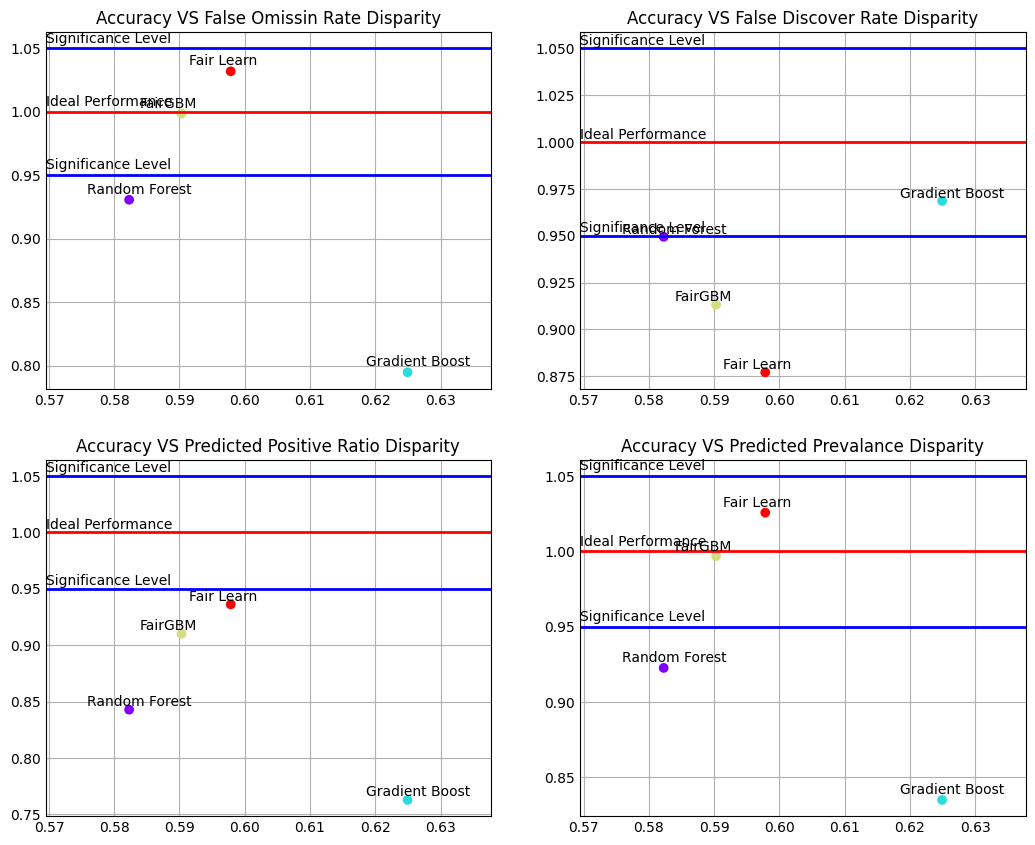

In [8]:
plt.style.use('_mpl-gallery')


# plot
fig, ax = plt.subplots(2,2,figsize=(10,8))

putil.plot_scatter(ax[0][0],result["Accuracy"],result["False Omissin Rate Disparity"],"Accuracy VS False Omissin Rate Disparity",result.index)
putil.plot_scatter(ax[0][1],result["Accuracy"],result["False Discover Rate Disparity"],"Accuracy VS False Discover Rate Disparity",result.index)
putil.plot_scatter(ax[1][0],result["Accuracy"],result["Predicted Positive Ratio Disparity"],"Accuracy VS Predicted Positive Ratio Disparity",result.index)
putil.plot_scatter(ax[1][1],result["Accuracy"],result["Predicted Prevalance Disparity"],"Accuracy VS Predicted Prevalance Disparity",result.index)

plt.show()